### Niwot Ridge, Colorado, USA

**Station name:** nwot

**Location:** [Niwot Ridge LTER](https://nwt.lternet.edu)

**Archive:** [UNAVCO](https://www.unavco.org)

**Ellipsoidal Coordinates:**

- Latitude: 40.05539 

- Longitude: -105.59053

- Height(m): 3522.729 

[UNAVCO station page](https://www.unavco.org/instrumentation/networks/status/nota/overview/NWOT)



<img src="https://www.unavco.org/data/gps-gnss/lib/images/station_images/NWOT.jpg" width=500/>


In [1]:
import ipywidgets as widgets
import os

from pathlib import Path

from gnssrefl.utils import check_environment, set_environment, get_sys

notebook_dir = Path.cwd().parents[1]

# Making sure environment variables are set - this is required to run the gnssrefl code
exists = check_environment()
if exists == False:
    set_environment(refl_code=str(notebook_dir),
                    orbits=str(notebook_dir / "orbits"),
                    exe=str(notebook_dir / "exe"))
    
#If you are running this locally - make sure the items in the exe folder have execution permissions

# Set local variable of refl_code location
refl_code_loc = os.environ['REFL_CODE']
print("refl_code location:", refl_code_loc)

# import gnssrefl functions
from gnssrefl.installexe_cl import installexe
from gnssrefl.rinex2snr_cl import rinex2snr
from gnssrefl.quickLook_cl import quicklook
from gnssrefl.gnssir_cl import gnssir
from gnssrefl.gnssir_input import make_gnssir_input
from gnssrefl.daily_avg_cl import daily_avg


# import the crx2rnx file which is dependent on your working OS - this is required to run the gnssrefl code
# If in docker environment, then you do not need to download crxnrnx
try:
    os.environ['DOCKER']
except KeyError:
    sys = get_sys()
    installexe(sys)

environment variable ORBITS set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits 
environment variable REFL_CODE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks 
environment variable EXE set to path /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
refl_code location: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks
Your executable environment area:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/exe
There is no teqc executable for this architecture, so none will be installed.
This Hatanaka executable already exists
The gfzrnx executable already exists


**Fast Mode:** 
this will download data weekly instead of daily

In [2]:
weekly = widgets.Checkbox(value=True, description='Fast Mode', disabled=False, indent=False)
weekly

Checkbox(value=True, description='Fast Mode', indent=False)

Deselect the Fast Mode checkbox to deactivate fast mode.

### Data Summary
Station nwot was originally installed/designed to support GPS reflections research. The site was hosted by the Niwot Ridge LTER.

nwot was made to be taller than the typical geodetic antenna so that it would not be buried by snow. It is about 3 meters above the bare soil surface. Because it was installed to support testing GPS reflections, nwot has always tracked L2C.

For this example, we will focus on the data between 2009-2015.

### Imports

### Make a SNR File and run quickLook

We will start by making a SNR file. The main archive for this dataset only provides the high-quality L2C data in the highrate (1-sec) area. We do not need this sample rate for GPS reflectometry, we will use the "special" archive option where the 1-sec data have been decimated to 15 seconds:

In [3]:
station = 'nwot'
year = 2014
doy = 270

In [4]:
rinex2snr(station, year, doy, archive='special')

#if for some reason the above command does not work - uncomment below and use that instead:
#rinex2snr(station, year, doy, archive='unavco', rate=high, dec=15)

nwot  year: 2014  doy: 270 from:  special
Requested a GPS only nav file
100% [..............................................................................] 75075 / 75075found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2014/nav/auto2700.14n
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2014/snr/nwot/nwot2700.14.snr66
That took  1.73  seconds
Feedback written to subdirectory logs


Now let's use this `quickLook` command to get a sense of the quality of the 
reflector height (RH) retrievals. 

First L1:

minimum elevation angle (degrees) for this dataset:  0.0005
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/quickLook_summary.png


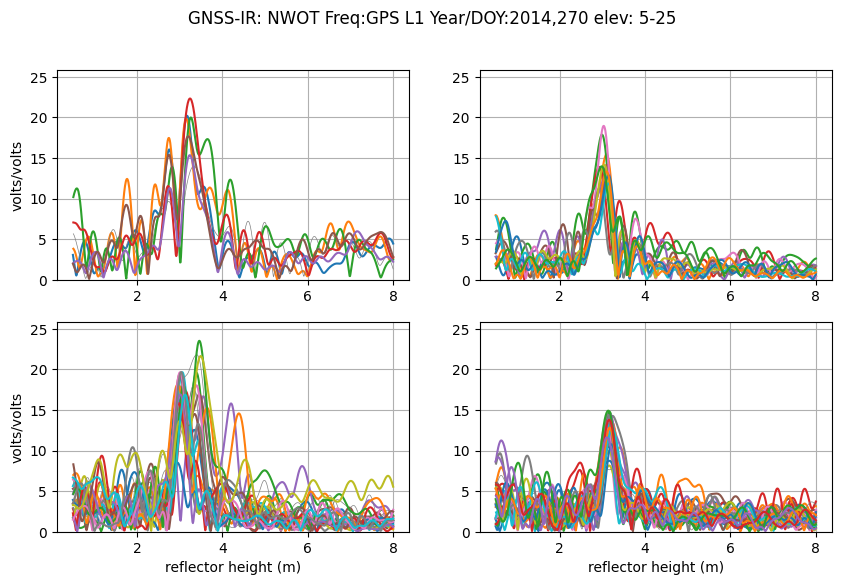

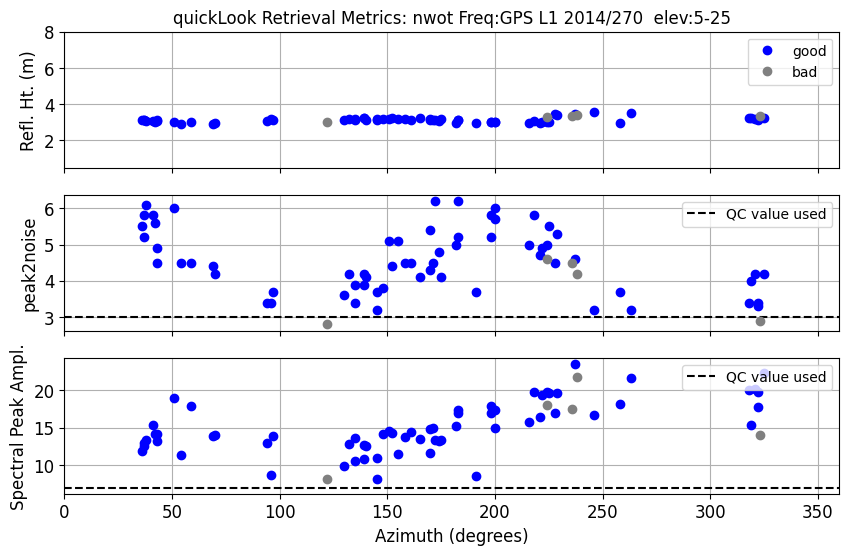

In [5]:
values, metrics = quicklook(station, year, doy=doy)

These periodograms are a bit busy in the low RH area. But there are 
nice strong peaks in a few of the quadrants. So we can see from this that there may be some azimuth ranges that we will want to remove for teh analysis.

Now try L2:

minimum elevation angle (degrees) for this dataset:  0.0005
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/quickLook_summary.png


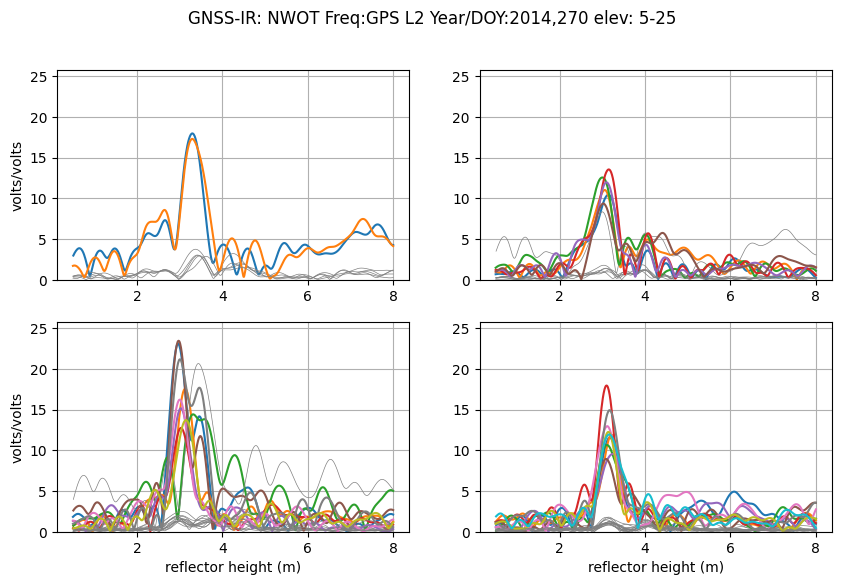

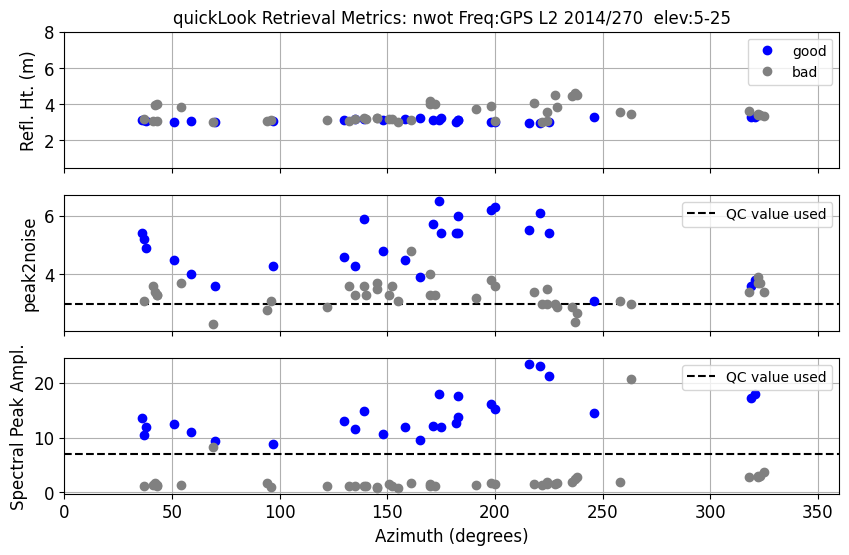

In [6]:
values, metrics = quicklook(station, year, doy=doy, fr=2)

This plot will have both L2C and non-L2C. There are failed tracks in the gray that are the non-L2C signals.

See L2C only:

minimum elevation angle (degrees) for this dataset:  0.0005
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/quickLook_lsp.png
plot saved to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/quickLook_summary.png


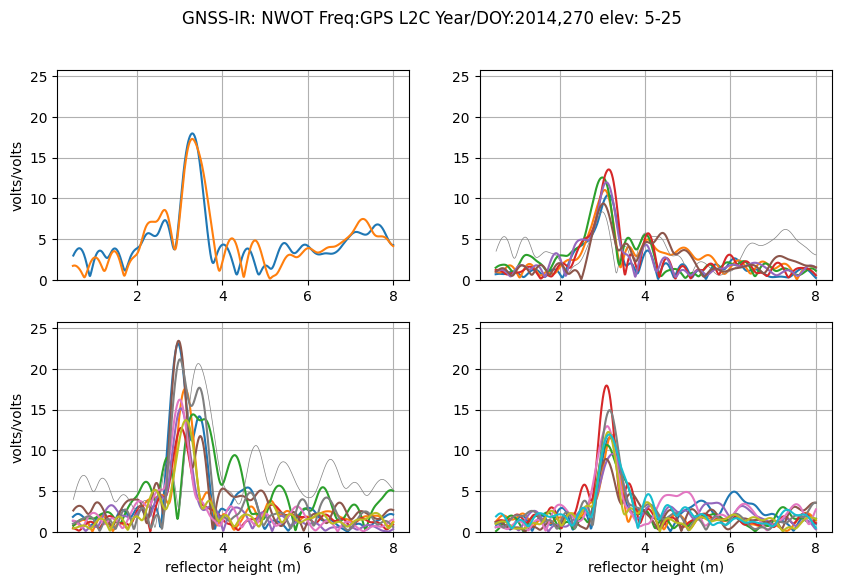

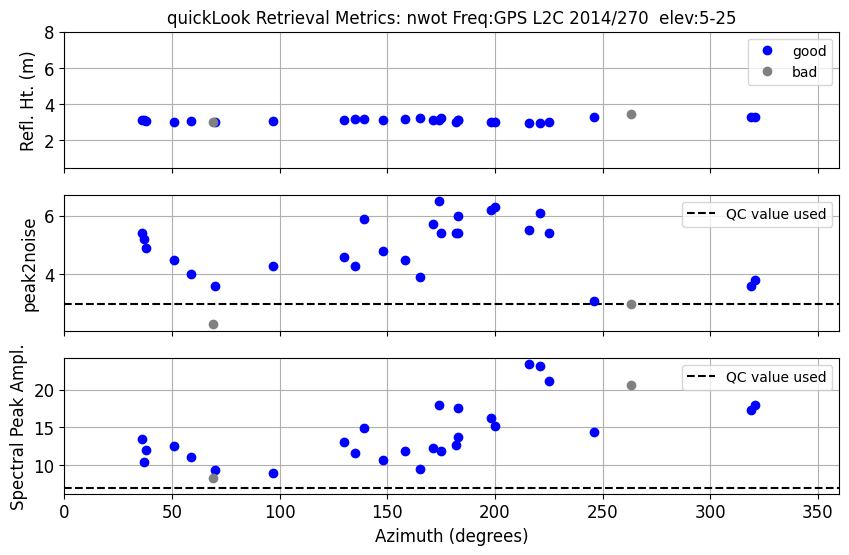

In [7]:
values, metrics = quicklook(station, year, doy=doy, fr=20)

Those failed tracks are now gone and we will use L2C and not all of L2.

### Make multiple years of SNR files 

We are going to look at the data from installation (Fall 2009) through Spring 2015.

In [8]:
rinex2snr(station, year=2009, doy=240, year_end=2015, doy_end=120, archive='special', weekly=weekly.value)

You have invoked the weekly option
nwot  year: 2009  doy: 240 from:  special
Requested a GPS only nav file
100% [..............................................................................] 75741 / 75741found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2009/nav/auto2400.09n
Seeking permission from Earthscope to use their archive
File was not found nwot2400.09o.gz
Either the RINEX file or orbit file does not exist, so there is nothing to convert
nwot  year: 2009  doy: 247 from:  special
Requested a GPS only nav file
100% [..............................................................................] 73395 / 73395found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2009/nav/auto2470.09n
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2009/snr/nwot/nwot2470.09.snr66
nwot  year: 2009  doy: 254 from:  speci

uncompress: auto0430.10n.Z: Inappropriate file type or format


SOPAC download did not work, so will try CDDIS
Try the unix compressed version
Try the gzipped version
Change the filename to what we use  auto0430.10n
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2010/nav/auto0430.10n
Seeking permission from Earthscope to use their archive
File was not found nwot0430.10o.gz
Either the RINEX file or orbit file does not exist, so there is nothing to convert
nwot  year: 2010  doy: 50 from:  special
Requested a GPS only nav file
100% [..............................................................................] 73785 / 73785found nav file at SOPAC
Orbit file:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/orbits/2010/nav/auto0500.10n
Seeking permission from Earthscope to use their archive


SUCCESS: SNR file was created 
 /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/2010/snr/nwot/nwot0500.10.snr66
nwot  year: 2010  doy: 57 from:  special
Requested a GPS only nav file
100% [.........................................

### Run gnssir for multiple years
We will use a peak to noise of about 3 and a spectral peak amplitude of 8. We'll also use the southern quadrants (azimuths 90 through 270). We should note that since L5 was not tracked at this site, we will not include it in the json file. Well use a minimum elevation angle of 7 degrees because this particular receiver had a limit on the number of satellites it could track.

Save your gnssir strategy:

In [11]:
make_gnssir_input(station, e1=7, peak2noise=3.2, ampl=8, azlist2=[90, 270], frlist=[1,20])

Assume you want to use the UNR database.
Implementing user-provided frequency list.
writing out to: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/nwot.json


Now we will set our azimuth range and the frequencies manually.

Run gnssir for the years 2009-2015:

In [12]:
gnssir(station, year=2009, doy=1, doy_end=366, year_end=2015)

{'station': 'nwot', 'lat': 40.055386693, 'lon': -105.590527894, 'ht': 3522.449391, 'minH': 0.5, 'maxH': 8.0, 'e1': 7, 'e2': 25.0, 'NReg': [0.5, 8.0], 'PkNoise': 3.2, 'polyV': 4, 'pele': [5, 30], 'ediff': 2.0, 'desiredP': 0.005, 'azval2': [90, 270], 'freqs': [1, 20], 'reqAmp': [8, 8], 'refraction': True, 'overwriteResults': True, 'seekRinex': False, 'wantCompression': False, 'plt_screen': False, 'onesat': None, 'screenstats': False, 'pltname': 'nwot_lsp.png', 'delTmax': 75.0, 'gzip': False, 'ellist': []}
refraction file exists
requested frequencies  [1, 20]
Using the New Way of Selecting Arcs
Augmented elevation angle list []
Requested azimuths:  [90, 270]
Using azimuths:  [90, 270]
A station specific refraction output file will be written to  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/nwot_refr.txt
found  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/
The large refraction file should be stored here: /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/input/gp

### Compute daily average RH values
Now we will use the daily_avg utility to compute RH for each day. A median filter of 0.25 meter is used to eliminate large outliers and a minimum number of tracks will be set to 10. This is relatively low because of the small number of L2C transmitting satellites in the early years of the dataset.

All RH retrievals - including bad ones - will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/nwot_allRH.txt.noqc 

All RH retrievals that meet your median filter and ReqTracks criteria will be written to: 
/Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/nwot_allRH.txt 

A total of  292  days were evaluated.
0  days did not meet the threshold set for a dependable daily average
All RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/nwot_AllRH.png
All RH png file without QC saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/nwot_AllRH_noQC.png
Daily average RH png file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/nwot_RH.png
Daily average RH amplitude file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/nwot_RHamp.png
Number of values used in average RH file saved as:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/

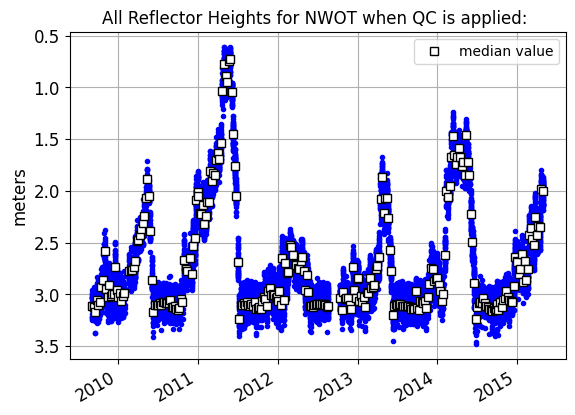

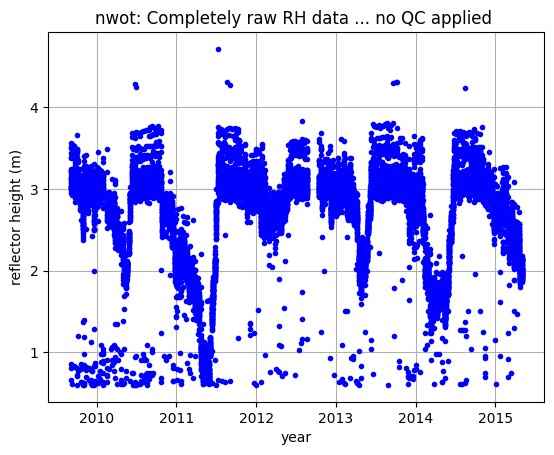

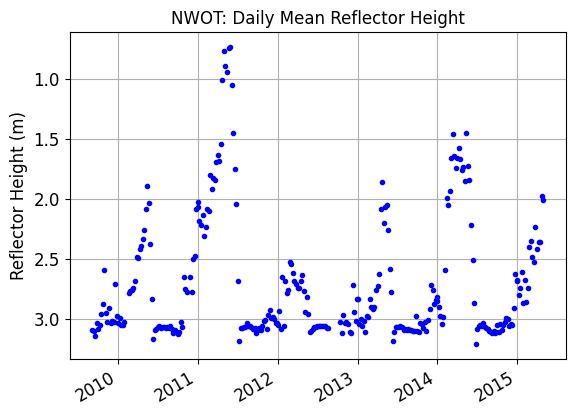

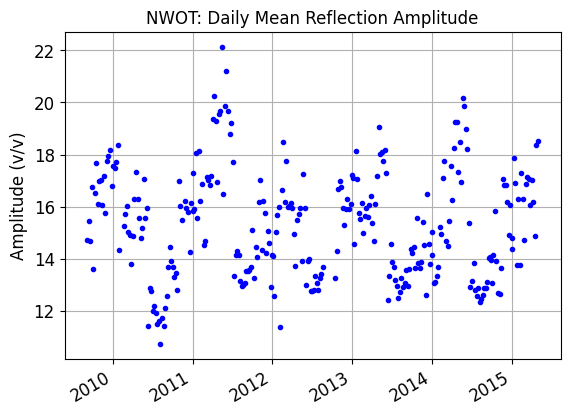

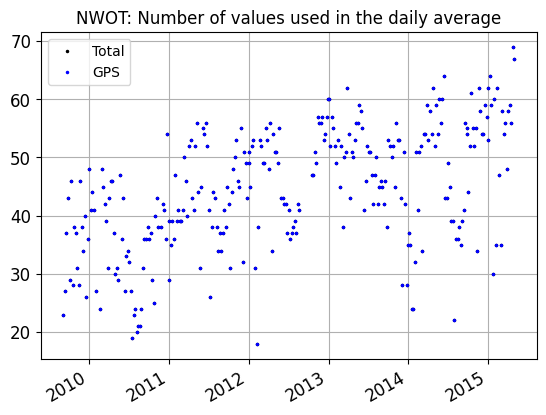


Daily average RH file written to:  /Users/kellyenloe/EarthScope/gnssrefl_tim/notebooks/Files/nwot/nwot_dailyRH.txt


In [16]:
daily_avg(station, medfilter=.25, ReqTracks=10, year1=2009, year2=2015, txtfile='nwot_dailyRH.txt')

### Validation

The GPS site at Niwot Ridge was installed because there was a long-standing experiment 
for measuring snow depth. We therefore have a way to assess
accuracy. We download the *in situ* data from 
the [Niwot Ridge facility](https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-nwt&identifier=34) and will compare to pole 16.

<code>snow depth = RH_baresoil - RH</code>

We will make an estimate of the bare soil reflector height by taking an average of the reflector heights from august to mid september.

We will then download the data and plot it over the same time period that we analyzed.

No snow RH value:    3.084 (m)


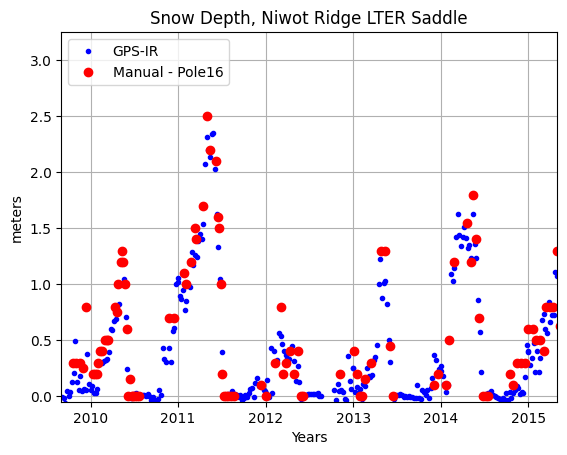

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

# in situ data for Niwot Ridge LTER
# https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-nwt&identifier=34
insitufile = '../../../docs/use_cases/saddsnow.dw.data.csv'
# save the date, pole#, and snow depth columns (cm)
insitu= np.loadtxt(insitufile,skiprows=1,delimiter=',',dtype='str',usecols=(3,2,4))
# pick out pole 16, which is closest to nwot GPS site
ij = insitu[:,1] == '16'
insitu = insitu[ij,:]

date = insitu[:,0] # date string
sval= insitu[:,2] # snow depth as string

# arrays for the in insitu answers
obst = np.empty(shape=[0, 1])
snow = np.empty(shape=[0,1])
for i in range(0,len(insitu)):
    y=int(date[i][0:4])
    m=int(date[i][5:7])
    d=int(date[i][8:10])
    s = float(sval[i])/100
    obst= np.append(obst, datetime(year=y, month=m, day=d))
    snow = np.append(snow,s)

# read in the daily average RH file
gpsfile = f'{refl_code_loc}/Files/nwot/nwot_dailyRH.txt'
gps = np.loadtxt(gpsfile,comments='%')

# going to use august and mid-september to determine "no snow level"
# for other sites, you might be able to use all of september ...
# doy 213 through doy 258 
# RH is stored in column 2, doy is in column 1
ii = (gps[:,1] >= 213) & (gps[:,1] <= 258)
noSnowRH = np.mean(gps[ii,2])
print('No snow RH value: ', '{0:7.3f}'.format( noSnowRH),'(m)' )

# make a datetime array for plotting the gps results
gobst = np.empty(shape=[0, 1])
for i in range(0,len(gps)):
    gobst = np.append(gobst, datetime(year=int(gps[i,0]), month=int(gps[i,4]), day=int(gps[i,5])))

snowAccum = noSnowRH - gps[:,2]

plt.figure()
plt.plot(gobst, snowAccum, 'b.',label='GPS-IR')
plt.plot(obst,snow,'ro',label='Manual - Pole16',markersize=6)
plt.legend(loc="upper left")
plt.title('Snow Depth, Niwot Ridge LTER Saddle')
plt.xlabel('Years')
plt.ylabel('meters')
plt.grid()
left = datetime(year=2009, month=9, day = 1)
right = datetime(year=2015, month=5, day = 1)
plt.xlim((left, right))
plt.ylim((-0.05, 3.25))
plt.show()
# GPS receiver failed in spring 2015

Citation for data:

Walker, S., J. Morse, and Niwot Ridge LTER. 2020. Snow depth data for saddle snowfence, 1992 - ongoing. ver 11. Environmental Data Initiative. [https://doi.org/10.6073/pasta/abf23758a2e5194aded95bd18c8cbf27] (Accessed 2021-10-19).


This is one of those cases where we would want to note that pole measurements are not representative of the same
footprint as the GPS measurements. As GPS measurements cover an average over a much larger region.

We do not continue with a more quantitative comparison for this demo as there are at least two 
publications in journals and a PhD Dissertation:

[Gutmann, E., K. M. Larson, M. Williams, F.G. Nievinski, and V. Zavorotny, 
Snow measurement by GPS interferometric reflectometry: an evaluation at Niwot Ridge, Colorado, Hydrologic Processes, Vol. 26, 2951-2961, 2012](https://www.kristinelarson.net/wp-content/uploads/2015/10/GutmannEtAl_2012.pdf)

[Nievinski, F.G. and K.M. Larson, Inverse Modeling of GPS Multipath for Snow Depth Estimation, Part II: Application and Validation, IEEE TGRS, Vol. 52(10), 6564-6573, doi:10.1109/TGRS.2013.2297688, 2014](https://www.kristinelarson.net/wp-content/uploads/2015/10/felipe_inv2_revised.pdf)

[Nievinski, F.G., Ph.D. Dissertation, University of Colorado, 2013](https://www.researchgate.net/publication/258848060_Forward_and_Inverse_Modeling_of_GPS_Multipath_for_Snow_Monitoring)